In [2]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy import stats
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from sklearn import preprocessing
import matplotlib.cm as cm
import seaborn as sns

day_list_long = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
day_list_short = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
day_list_Feb = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
x_label = []
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    if month in ['01', '03', '05', '07', '08','10', '12']:
        day_list = day_list_long
    elif month == '02':
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
        for hour in range(0,24):
            hour = str(hour)
            key = int('22'+ month + day + hour)
            key = str(key)
            x_label.append(key)

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'TokyoStation MI=0.19')

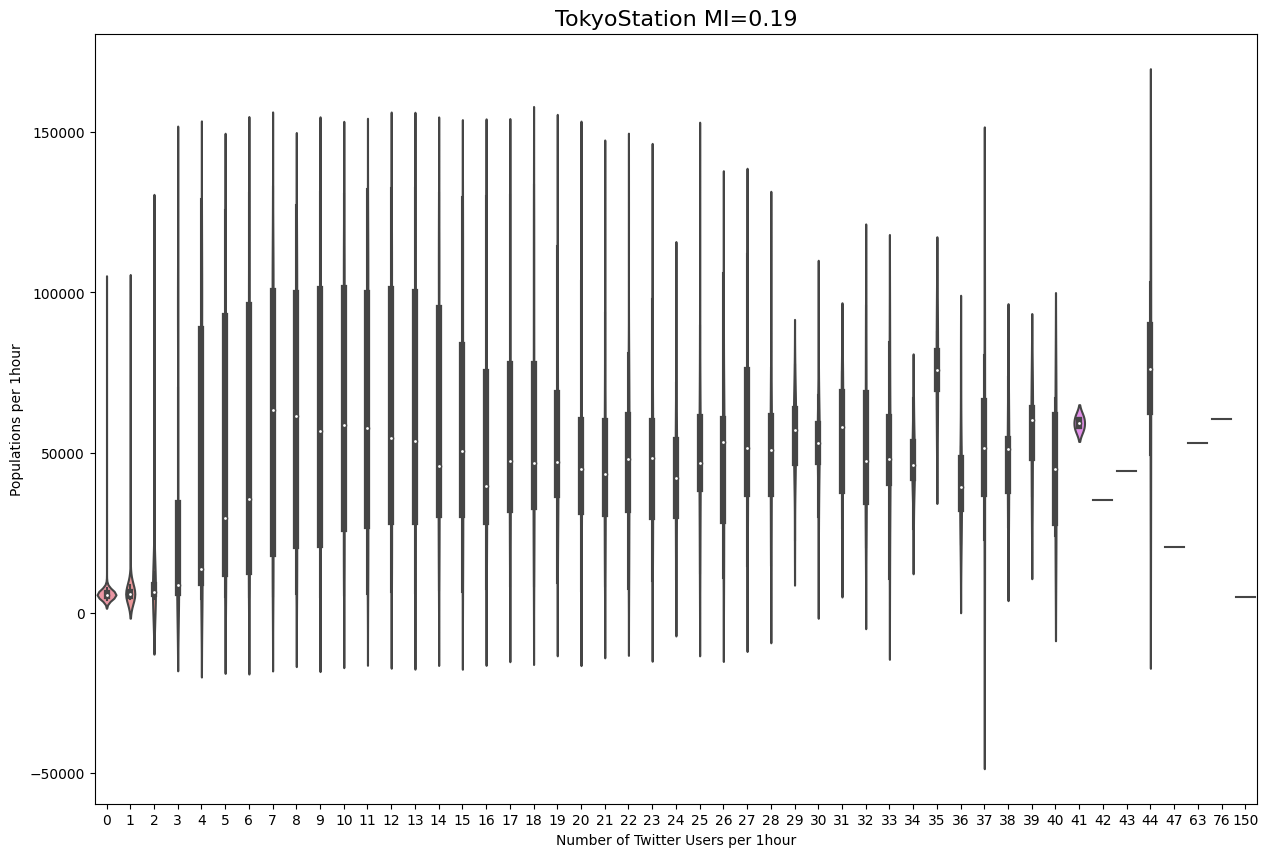

In [26]:
mobile = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Tokyostation/Tokyostation_2021.npy')
tweets = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Tokyostation_2021/users.npy')
name_key = 'TokyoStation'
mobile_flatten = mobile.flatten()
tweets_flatten = tweets.flatten()

tmp = np.stack([tweets_flatten, mobile_flatten])
df_mobile_tweets = pd.DataFrame(data = tmp.T, columns=['Tweets_num', 'Population'])


x_axis = []
for i in range(0, max(df_mobile_tweets['Tweets_num'])+1):
    x_axis.append(i)


a, b = np.polyfit(tweets_flatten, mobile_flatten, 1)
y2 = a * np.array(x_axis) + b
df2glaph = pd.DataFrame(np.stack((x_axis, y2)).T, columns=['Tweets_num', 'Population'])

X = mobile_flatten.reshape(-1,1)
y = tweets_flatten.reshape(-1,1)
a, b = np.polyfit(X[:,0], y, 1)
mi = mutual_info_regression(X, y)
f_test, _ = f_regression(X, y)
#フィッティング直線

plt.figure(figsize=(15, 10))
sns.violinplot(x='Tweets_num', y='Population', data=df_mobile_tweets)
#sns.stripplot(x='Tweets_num', y='Population', data=df_mobile_tweets)
#sns.regplot(x='Tweets_num', y='Population', data=df2glaph)
#plt.xticks(x_axis, x_axis)
plt.xlabel('Number of Twitter Users per 1hour')
plt.ylabel('Populations per 1hour')
plt.title("{} MI={:.2f}".format(name_key, mi[0]), fontsize=16)

In [20]:
df_mobile_tweets

,Tweets_num,Population
0,9,14343
1,4,15105
2,4,15049
3,2,15091
4,3,15133
...,...,...
8755,20,21602
8756,27,19983
8757,14,18552
8758,22,17337
